In [1]:
!pip install -U numpy
#설치 후 런타임 다시 연결

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 107.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


In [2]:
# Konlpy 라이브러리 설치
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 33.5 MB/s eta 0:00:00


In [ ]:
# !apt-get update
# !apt-get install g++ openjdk-8-jdk
# !pip3 install konlpy JPype1-py3
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [3]:
 ! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 122 (delta 15), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (122/122), 1.27 MiB | 9.51 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [4]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [5]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [6]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_220429.sh


## 사용자 사전

---
(안 되면 런타임 안 돌리고 한 번 더 실행)


In [56]:
!bash install_mecab-ko_on_colab_light_220429.sh

bash: install_mecab-ko_on_colab_light_220429.sh: No such file or directory


In [57]:
cd /content/mecab-ko-dic-2.1.1-20180720

/content/mecab-ko-dic-2.1.1-20180720


In [58]:
!pip install jamo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from jamo import h2j, j2hcj


def get_jongsung_TF(sample_text):
    sample_text_list = list(sample_text)
    last_word = sample_text_list[-1]
    last_word_jamo_list = list(j2hcj(h2j(last_word)))
    last_jamo = last_word_jamo_list[-1]

    jongsung_TF = "T"

    if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']:
        jongsung_TF = "F"

    return jongsung_TF

In [60]:
def make_user_dic_csv(morpheme_type, word_list, user_dic_file_name):
  file_data = []

  for word, score in word_list:
    jongsung_TF = get_jongsung_TF(word)

    line = f"{word},,,{score},{morpheme_type},*,{jongsung_TF},{word},*,*,*,*,*\n"

    file_data.append(line)

  with open("./user-dic/user-nnp.csv", 'w', encoding='utf-8') as f:
    for line in file_data:
      f.write(line)
  with open("./user-dic/user-nnp.csv", 'r', encoding='utf-8') as f:
    file_new = f.readlines()
  print(file_new)
  with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f:
    file_new = f.readlines()
  print(file_new)

In [61]:
# 이거는 명사만 넣는 거임.  단어를 사용자 사전에 넣는데, NNP (명사)로 본다.

word_list = [('리무버', 0), ('블랙헤드', 0),('프리메라',0),('리뉴얼',0), ('세안후', 0), ('클렌징', 0), ('화이트 헤드', 0), ('마녀 공장', 0), ('마녀공장', 0), ('세안 후', 0)]
make_user_dic_csv(morpheme_type="NNP", word_list=word_list, user_dic_file_name='user-nnp.csv')

['리무버,,,0,NNP,*,F,리무버,*,*,*,*,*\n', '블랙헤드,,,0,NNP,*,F,블랙헤드,*,*,*,*,*\n', '프리메라,,,0,NNP,*,F,프리메라,*,*,*,*,*\n', '리뉴얼,,,0,NNP,*,T,리뉴얼,*,*,*,*,*\n', '세안후,,,0,NNP,*,F,세안후,*,*,*,*,*\n', '클렌징,,,0,NNP,*,T,클렌징,*,*,*,*,*\n', '화이트 헤드,,,0,NNP,*,F,화이트 헤드,*,*,*,*,*\n', '마녀 공장,,,0,NNP,*,T,마녀 공장,*,*,*,*,*\n', '마녀공장,,,0,NNP,*,T,마녀공장,*,*,*,*,*\n', '세안 후,,,0,NNP,*,F,세안 후,*,*,*,*,*\n']
['대우,,,,NNP,*,F,대우,*,*,*,*,*\n', '구글,,,,NNP,*,T,구글,*,*,*,*,*\n']


In [62]:
!bash autogen.sh

Looking in current directory for macros.
configure.ac:2: warning: AM_INIT_AUTOMAKE: two- and three-arguments forms are deprecated.  For more info, see:
configure.ac:2: https://www.gnu.org/software/automake/manual/automake.html#Modernize-AM_005fINIT_005fAUTOMAKE-invocation


In [63]:
!make

 cd . && /bin/bash ./config.status Makefile 
config.status: creating Makefile
make: Nothing to be done for 'all'.


In [64]:
!sudo make install

make[1]: Entering directory '/content/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /usr/bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/content/mecab-ko-dic-2.1.1-20180720'


In [65]:
!bash ./tools/add-userdic.sh

generating userdic...
nnp.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
user-nnp.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/user-nnp.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF

In [66]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
%%capture
!pip install contextualized-topic-models==2.2.0

In [68]:
%%capture
!pip install pyldavis

# 초기 셋팅

In [70]:
from konlpy.tag import Mecab
m = Mecab()

In [71]:
m.pos('마녀공장 되게 별로임')

[('마녀공장', 'NNP'), ('되게', 'MAG'), ('별로', 'MAG'), ('임', 'VCP+ETN')]

In [72]:
import pandas as pd
import numpy as np

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm, tqdm_notebook

In [76]:
#GPU 사용
device = torch.device("cuda:0")

In [77]:
import os

n_devices = torch.cuda.device_count()
print(n_devices)

for i in range(n_devices):
    print(torch.cuda.get_device_name(i))

0


In [78]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

No GPU available, using the CPU instead.


In [79]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# 마애 상품 모음 _ 이름변경 후 전처리

In [300]:
df = pd.read_csv('/content/drive/MyDrive/비머/데이터/마애 상품 모음_이름 변경 후.csv', encoding = 'cp949')
df.rename(columns={'Unnamed: 0' : 'group'}, inplace=True)

df.head()

,group,prd_nm,review
0,0,센카 퍼펙트 휩 페이셜 워시,??세정력 별로에요\n디렉터파이님 영상 보면 선크림도 거의 못 지우고\n메이크업 후...
1,1,센카 퍼펙트 휩 페이셜 워시,콩만큼 짜도 거품이 와아악 나요\n향기도 청량하이 화장 지우는 맛 납니당… 헹구고 ...
2,2,센카 퍼펙트 휩 페이셜 워시,거품이 풍성해서 넘 좋아요 센카 브랜드는 워낙 클렌징폼으로 유명해서 의심없이 샀는데...
3,3,센카 퍼펙트 휩 페이셜 워시,올리브영 세일기간이라 저렴한 가격에 잘 산거 같아서 매우 만족합니다
4,4,센카 퍼펙트 휩 페이셜 워시,소량만으로도 쫀쫀한 거품이 아주 잘 나는 제품이에요\n몇년째 쓰고있는데 역시나 맘에듭니다


In [301]:
df['prd_nm'].value_counts()

prd_nm
닥터지 브라이트닝 필링젤                                        3984
프리메라 페이셜 마일드 필링                                      2998
센카 퍼펙트 휩 페이셜 워시                                      2913
바닐라코 클린잇제로 클렌징밤 포어클래리파잉                              2287
마녀공장 퓨어 클린징 오일                                       1982
바이오더마 센시비오                                           1792
마녀공장 갈락 필링젤                                          1620
[단독대용량] 바닐라코 립 앤 아이 리무버 클리어 250ml                     998
[단독기획] 비플레인 녹두 약산성 클렌징폼 (본품160ml+폼20ml+오일20ml 증정)     972
[증량] 마녀공장 퓨어&딥 클렌징 폼 1+1 기획 (120ml+120ml)             947
참존 징코 수딩 앤 클렌징 티슈 70매                                 879
메디필 레드 락토 콜라겐 클리어 300ml                               474
메디필 엑스트라 슈퍼9 플러스 250ml (피지연화제)                        360
니베아 센서티브 미셀라 에어 클렌징 워터                                357
더말로지카 데일리 마이크로폴리언트                                    343
에센허브 소이빈90 딥클렌징오일 오리지널                                269
뷰 앰플 클렌저 기획세트(150ml+60ml)                             257
바닐라코 클린

1번 그룹 : 상위권 이성 소구인 제품

2번 그룹 : 상위권 감성 소구인 제품

3번 그룹 : 하위권 이성 소구인 제품

4번 그룹 : 하위권 감성 소구인 제품

In [302]:
df['group'] = df['prd_nm'].map({'[증량] 마녀공장 퓨어&딥 클렌징 폼 1+1 기획 (120ml+120ml)' : 1,
                                '[단독기획] 비플레인 녹두 약산성 클렌징폼 (본품160ml+폼20ml+오일20ml 증정)' : 1,
                                '마녀공장 퓨어 클린징 오일': 1,
                                '바이오더마 센시비오': 1,
                                '닥터지 브라이트닝 필링젤' : 1,
                                '프리메라 페이셜 마일드 필링': 1,
                                '센카 퍼펙트 휩 페이셜 워시' :2, '메디필 레드 락토 콜라겐 클리어 300ml' :2,
                                '바닐라코 클린잇제로 클렌징밤 포어클래리파잉' :2, '메디필 엑스트라 슈퍼9 플러스 250ml (피지연화제)' :2,
                                '마녀공장 갈락 필링젤':2, '[단독대용량] 바닐라코 립 앤 아이 리무버 클리어 250ml':2,
                                '유리아쥬 이제악 클렌징 젤 150ml' :3, '[단독기획] 그라펜 제주해수 버블클렌저 150ml (단품 / 1+1 기획)':3,
                                '니베아 센서티브 미셀라 에어 클렌징 워터' :3, '에센허브 소이빈90 딥클렌징오일 오리지널':3,
                                '센카 올 클리어 시트 프레시 30매' :3, '궁중비책 마일드 선클렌징 티슈 (10매+10메+10매)':3,
                               '뷰 앰플 클렌저 기획세트(150ml+60ml)' :4, '[몬스타엑스 민혁 PICK]플로운 홀리바질 페이셜 팩투 클렌징폼 150ml' :4,
                                '유리프 키 페이스 클렌징 오일' :4, '바닐라코 클린잇제로 클렌징밤 너리싱 100ml':4,
                                '더말로지카 데일리 마이크로폴리언트' :4, '참존 징코 수딩 앤 클렌징 티슈 70매':4
                                })

In [303]:
df

,group,prd_nm,review
0,2,센카 퍼펙트 휩 페이셜 워시,??세정력 별로에요\n디렉터파이님 영상 보면 선크림도 거의 못 지우고\n메이크업 후...
1,2,센카 퍼펙트 휩 페이셜 워시,콩만큼 짜도 거품이 와아악 나요\n향기도 청량하이 화장 지우는 맛 납니당… 헹구고 ...
2,2,센카 퍼펙트 휩 페이셜 워시,거품이 풍성해서 넘 좋아요 센카 브랜드는 워낙 클렌징폼으로 유명해서 의심없이 샀는데...
3,2,센카 퍼펙트 휩 페이셜 워시,올리브영 세일기간이라 저렴한 가격에 잘 산거 같아서 매우 만족합니다
4,2,센카 퍼펙트 휩 페이셜 워시,소량만으로도 쫀쫀한 거품이 아주 잘 나는 제품이에요\n몇년째 쓰고있는데 역시나 맘에듭니다
...,...,...,...
24542,1,닥터지 브라이트닝 필링젤,얼굴에 사용하면 살짝 자극이 있는 제품인거 같다.\n처음에는 꾸준히 사용했는데 자극...
24543,1,닥터지 브라이트닝 필링젤,세수하고 물 있는 상태에서 바르니까 넘 편하구조음 ㅋㅋ\n때처럼 겁나 밀려서 당황했...
24544,1,닥터지 브라이트닝 필링젤,평소 쓰던 제품인데 세일하고 쿠폰까지 해서 훨씬 저렴하게 샀네요. 자극적이지 않고 ...
24545,1,닥터지 브라이트닝 필링젤,케어존 필링젤 계속 사용하다가 오히려 각질이 더 생기는 기분이라 닥터지 제품도 구매...


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24547 entries, 0 to 24546
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   24547 non-null  int64 
 1   prd_nm  24547 non-null  object
 2   review  24488 non-null  object
dtypes: int64(1), object(2)
memory usage: 575.4+ KB


In [305]:
df[df.review.isnull()]

,group,prd_nm,review
1342,4,[몬스타엑스 민혁 PICK]플로운 홀리바질 페이셜 팩투 클렌징폼 150ml,NaN
1508,3,유리아쥬 이제악 클렌징 젤 150ml,NaN
1571,3,유리아쥬 이제악 클렌징 젤 150ml,NaN
1572,3,유리아쥬 이제악 클렌징 젤 150ml,NaN
1576,3,유리아쥬 이제악 클렌징 젤 150ml,NaN
1577,3,유리아쥬 이제악 클렌징 젤 150ml,NaN
1578,3,유리아쥬 이제악 클렌징 젤 150ml,NaN
1579,3,유리아쥬 이제악 클렌징 젤 150ml,NaN
1580,3,유리아쥬 이제악 클렌징 젤 150ml,NaN
1581,3,유리아쥬 이제악 클렌징 젤 150ml,NaN


In [306]:
df.dropna(inplace = True)

In [307]:
df = df.reset_index().iloc[:,1:]

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24488 entries, 0 to 24487
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   24488 non-null  int64 
 1   prd_nm  24488 non-null  object
 2   review  24488 non-null  object
dtypes: int64(1), object(2)
memory usage: 574.1+ KB


In [309]:
data = df.copy()

#TF -IDF

In [90]:
from konlpy.tag import Mecab

# 형태소 분석기 초기화
mecab = Mecab()

# prd_nm 열을 전처리하여 명사와 형용사 원형만 추출하는 함수
def preprocess_text(text):
    # 형태소 분석 결과에서 명사와 형용사 원형만 추출 (stem 옵션 추가)
    pos_list = mecab.pos(text)
    word_list = [pos[0] for pos in pos_list if pos[1] in ['NNG', 'VA', 'VV']]
    # 추출된 명사와 형용사 원형을 공백으로 구분하여 반환
    return ' '.join(word_list)

In [91]:
df3 = data[data['group'].isin([1, 3])]

In [92]:
df4 = data[data['group'].isin([2, 4])]

In [93]:
# 이성(1+ 3)
df3['review_pos'] = df3['review'].apply(preprocess_text)

df3.head()

<ipython-input-93-10a5fc98d9f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['review_pos'] = df3['review'].apply(preprocess_text)


,group,prd_nm,review,review_pos
200,1,[증량] 마녀공장 퓨어&딥 클렌징 폼 1+1 기획 (120ml+120ml),건성이라 폼클 사용후엔 얼굴당김을 심하게 느끼는데요.\n마녀공장 폼클에서는 얼굴당김...,건성 폼 사용 후 얼굴 심하 느끼 폼 클 얼굴 적 딥 클렌징 이름 세정력 좋 클렌징...
201,1,[증량] 마녀공장 퓨어&딥 클렌징 폼 1+1 기획 (120ml+120ml),요즘 저녁 세안용으로 잘 사용하고 있어요. 지성인데다가 메이크업을 진하게 하는 편이...,요즘 저녁 세안 사용 지성 메이크업 진하 하 저녁 세안 때 세정력 있 폼 클렌징 약...
202,1,[증량] 마녀공장 퓨어&딥 클렌징 폼 1+1 기획 (120ml+120ml),존뜩존뜩한게 모공 속까지\n깔끔하게 지워주고 거품도 왜이리\n잘나는지 세정력 만땅인...,모공 속 거품 잘나 세정력 땅 클렌징 제품 가격 화장
203,1,[증량] 마녀공장 퓨어&딥 클렌징 폼 1+1 기획 (120ml+120ml),원플원에 용량도 다른 제품에 비해 더 크고\n괜찮은 가격이라 일단 가성비갑 제품\n...,원 플 원 용량 제품 크 괜찮 가격 가성 비갑 제품 좋 점 세안 당기 세정력 느낌 ...
204,1,[증량] 마녀공장 퓨어&딥 클렌징 폼 1+1 기획 (120ml+120ml),한달내내 너무 잘 사용하고 있어요??????\n\n티존 악지성??나머진 지성??인데...,사용 티 악지 지성 세정력 제품 사용 얼굴 땡기 잔주름 세정력 좋 당기 제품 찾 폼...


In [94]:
# 감성(2 + 4)
df4['review_pos'] = df4['review'].apply(preprocess_text)

df4.head()

<ipython-input-94-b2dea40e1ddb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['review_pos'] = df4['review'].apply(preprocess_text)


,group,prd_nm,review,review_pos
0,2,센카 퍼펙트 휩 페이셜 워시,??세정력 별로에요\n디렉터파이님 영상 보면 선크림도 거의 못 지우고\n메이크업 후...,세정력 영상 보 선크림 지우 메이크업 후 세안 사용 거울 보 나비 모공 메이크업 잔...
1,2,센카 퍼펙트 휩 페이셜 워시,콩만큼 짜도 거품이 와아악 나요\n향기도 청량하이 화장 지우는 맛 납니당… 헹구고 ...,콩 짜도 거품 청량 화장 지우 맛 납 헹구 얼굴
2,2,센카 퍼펙트 휩 페이셜 워시,거품이 풍성해서 넘 좋아요 센카 브랜드는 워낙 클렌징폼으로 유명해서 의심없이 샀는데...,거품 좋 브랜드 폼 유명 의심 거품 수분 유지 같
3,2,센카 퍼펙트 휩 페이셜 워시,올리브영 세일기간이라 저렴한 가격에 잘 산거 같아서 매우 만족합니다,올리브 영 세일 기간 가격 같 만족
4,2,센카 퍼펙트 휩 페이셜 워시,소량만으로도 쫀쫀한 거품이 아주 잘 나는 제품이에요\n몇년째 쓰고있는데 역시나 맘에듭니다,소량 거품 제품 쓰 역시 맘


In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = ['ㅎㅎ','같아요','계속','그냥','그래서','그리고','근데','너무','하고','해서','바로','사용','사용하고',
            '하면','합니다','했는데','했어요','하게','하는','구매','생각','쓰고','아주','않고','얼굴',
            '입니다','있는','있어요','정도','정말','조금','좋고','좋아요','좋은','진짜','클렌징',
            '클렌징폼','폼클렌징','한번','때문','다른','보고','않아서','없고','없어서','일단',
            '있습니다','있어서','처음','하기','항상','하나','하는데','되는','쓰기','쓰는','했습니다',
             '같습니다', '같은', '좋네요', '좋습니다', '좋아서', '나서' , '보니', '좋았어요',
             '아니다', '않다', '없다', '좋다', '해주다', '같다', '그렇다', '되다', '되어다', '사다', '써다',
             '쓰다', '이다', '있다', '자다', '하다', '해보다', '나다',
             '보다', '거의', '넘다', '느껴지다', '느끼다', ]
tfidf = TfidfVectorizer(max_features=150, stop_words = stopwords)

# # TF-IDF 값을 데이터프레임으로 변환
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())

# # 제품명(prd_nm) 열 추가
# tfidf_df['prd_nm'] = df['prd_nm']

# tfidf_df.head()

In [96]:
# 이성 소구 집단 : 텍스트 데이터 벡터화
tfidf_matrix_lra = tfidf.fit_transform(df3['review_pos'])

tfidf.get_feature_names_out()

array(['가격', '가능', '가볍', '각질', '강추', '개인', '거품', '걱정', '건성', '건조', '경우',
       '고민', '관리', '괜찮', '구성', '구입', '귀찮', '그러', '그렇', '기대', '기분', '기존',
       '기초', '기획', '나쁘', '나오', '냄새', '녹두', '느낌', '다음', '단점', '당기', '대용량',
       '도움', '동안', '뒤집', '따갑', '롤링', '리필', '마무리', '마스카라', '마스크', '마음',
       '만들', '만족', '메이크업', '모공', '모르', '문지르', '문질', '물기', '밀리', '바르',
       '바이', '배송', '보습', '보이', '보통', '복합', '본품', '부결', '부담', '부드럽', '부분',
       '브랜드', '사람', '사이즈', '상태', '상품', '샘플', '생기', '샤워', '선크림', '성분',
       '성비', '세수', '세안', '세일', '세정', '세정력', '세트', '수분', '순하', '스킨케어',
       '심하', '아이', '아침', '알갱이', '약산성', '엄마', '여드름', '여행', '예전', '오더',
       '오일', '올라오', '올리브', '완전', '요즘', '용기', '용량', '워터', '유명', '유화', '의사',
       '이번', '이상', '이유', '일어나', '자극', '자체', '장점', '저녁', '전체', '정리', '정착',
       '제거', '제품', '제형', '좁쌀', '중요', '지금', '지성', '지우', '진정', '최고', '추천',
       '친구', '케어', '크기', '크림', '타입', '토너', '트러블', '티슈', '패드', '펌프', '편하',
       '평소', '플레인', '피부', '피지', '필링', '필요', '할인', '행사', '화장

In [97]:
# 감성 소구 집단 : 텍스트 데이터 벡터화
tfidf_matrix_lemo = tfidf.fit_transform(df4['review_pos'])

tfidf.get_feature_names_out()

array(['가격', '가능', '가볍', '각질', '강추', '개인', '거품', '걱정', '건성', '건조', '경우',
       '고민', '관리', '괜찮', '구입', '귀찮', '그러', '그렇', '기대', '기름', '기분', '기존',
       '기초', '기획', '나쁘', '나오', '남자', '냄새', '노폐물', '느끼', '느낌', '다음', '닦이',
       '단점', '당기', '대비', '대용량', '동안', '들어가', '따갑', '라인', '롤링', '마무리',
       '마스카라', '마음', '만들', '만족', '메이크업', '모공', '모르', '문지르', '문질', '바닐라',
       '바르', '보습', '보이', '복합', '부담', '부드럽', '부분', '불편', '브랜드', '사람',
       '사이즈', '상태', '상품', '샘플', '생기', '선크림', '성분', '성비', '세수', '세안', '세일',
       '세정', '세정력', '소량', '수분', '순하', '시림', '신경', '씻기', '아이', '아침', '알갱이',
       '약산성', '엄마', '여드름', '여름', '여행', '연화제', '예전', '예정', '오리지널', '오일',
       '올라오', '올리브', '완전', '요즘', '용량', '워터', '유명', '유분', '유화', '의사', '이번',
       '이상', '이용', '이유', '자극', '자체', '잔여', '잔여물', '잘나', '장점', '정리', '정착',
       '제거', '제품', '제형', '주변', '중요', '지성', '지우', '차이', '초록색', '최고', '추천',
       '친구', '케어', '크림', '클린', '타입', '트러블', '티슈', '편하', '평소', '프루프', '피부',
       '피지', '필링', '필요', '핑크', '할인', '행사', '화장',

#토픽 모델링_이성 + 감성(TOPIC 5)


In [101]:
from konlpy.tag import Mecab
mecab = Mecab()

In [102]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np

In [103]:
df['group'] = df['group'].map({3:1,
                               1:1,
                               2:2,
                               4:2})

1번 그룹 : 상위권 이성 소구인 제품

2번 그룹 : 상위권 감성 소구인 제품

3번 그룹 : 하위권 이성 소구인 제품

4번 그룹 : 하위권 감성 소구인 제품




In [104]:
df.rename(columns={'review' : 'text'}, inplace=True)
df.head()

,group,prd_nm,text
0,2,센카 퍼펙트 휩 페이셜 워시,??세정력 별로에요\n디렉터파이님 영상 보면 선크림도 거의 못 지우고\n메이크업 후...
1,2,센카 퍼펙트 휩 페이셜 워시,콩만큼 짜도 거품이 와아악 나요\n향기도 청량하이 화장 지우는 맛 납니당… 헹구고 ...
2,2,센카 퍼펙트 휩 페이셜 워시,거품이 풍성해서 넘 좋아요 센카 브랜드는 워낙 클렌징폼으로 유명해서 의심없이 샀는데...
3,2,센카 퍼펙트 휩 페이셜 워시,올리브영 세일기간이라 저렴한 가격에 잘 산거 같아서 매우 만족합니다
4,2,센카 퍼펙트 휩 페이셜 워시,소량만으로도 쫀쫀한 거품이 아주 잘 나는 제품이에요\n몇년째 쓰고있는데 역시나 맘에듭니다


In [105]:
# 텍스트 정제
def clean_text(text):
    text = text.replace(".", "").strip()
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

In [106]:
#문장 토큰
def get_nouns(tokenizer, sentence):
    tagged = tokenizer.pos(sentence)
    nouns = [s for s, t in tagged if t in ['NNG', 'NNP', 'VA', 'XR'] and len(s) >1]
    return nouns

def tokenize(df):
    tokenizer = Mecab(dicpath='/usr/local/lib/mecab/dic/mecab-ko-dic')
    processed_data = []
    for sent in tqdm(df['text']):
        sentence = clean_text(str(sent).replace("\n", "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

In [107]:
df.columns

Index(['group', 'prd_nm', 'text'], dtype='object')

In [108]:
# 문장 토큰화 하고, data 파일로 저장
def save_processed_data(processed_data):
    with open("tokenized_data_", 'w', newline="", encoding='utf-8') as f:
        writer = csv.writer(f)
        for data in processed_data:
            writer.writerow(data)

if __name__ == '__main__':
    df.columns=['group', 'prd_nm', 'text']
    df.dropna()
    processed_data = tokenize(df)
    save_processed_data(processed_data)

100%|██████████| 24488/24488 [00:07<00:00, 3440.14it/s]


In [110]:
processed_data

[['세정력',
  '디렉터',
  '파이',
  '영상',
  '선크림',
  '메이크업',
  '세안',
  '사용',
  '거울',
  '나비',
  '모공',
  '메이크업',
  '잔여물',
  '피지',
  '패드',
  '세안',
  '세정력',
  '알칼리',
  '클렌징',
  '불구',
  '각질',
  '제거',
  '며칠',
  '사용',
  '피부',
  '느낌',
  '거품',
  '거품',
  '클렌징',
  '요생',
  '크림',
  '거품',
  '센카',
  '장점',
  '요즘',
  '국내',
  '브랜드',
  '제품',
  '알칼리',
  '거품',
  '풍성',
  '각질',
  '제거',
  '성비',
  '제품',
  '트리',
  '클렌징',
  '추천',
  '센카',
  '초반',
  '세계',
  '제품',
  '구매',
  '의사'],
 ['짜도', '거품', '향기도', '청량', '화장', '얼굴'],
 ['거품', '풍성', '센카', '브랜드', '클렌징', '유명', '의심', '풍성', '거품', '세안후', '수분', '유지'],
 ['올리브', '세일', '기간', '저렴', '가격', '만족'],
 ['소량', '거품', '제품', '역시'],
 ['짜도', '거품', '향도', '마음'],
 ['복합', '사용', '자극', '세정력'],
 ['프로모션', '구입', '요순', '보습'],
 ['구매', '사용', '추천', '올리브', '이것저것', '다양'],
 ['센카', '유명', '설명', '주위', '사람', '추천', '이야기', '정도', '제품'],
 ['리뉴얼', '거품', '쫀쫀', '기대'],
 ['세안', '필요', '구매', '거품', '쫀득', '풍성'],
 ['사용', '거품', '제품', '쫀쫀'],
 ['사용', '센카', '퍼펙트', '정착', '저렴'],
 ['뻑뻑', '세정력', '괜찮'],
 ['사용',
  '리뷰',
  '복합',
  '피부',
 

In [111]:
processed_data = [sent.strip().split(",") for sent in tqdm(open("tokenized_data_",'r',encoding='utf-8').readlines())]
processed_data = DataFrame(processed_data)
processed_data[0] = processed_data[0].replace(" ", np.nan)
#processed_data = processed_data[processed_data[0].notnull()]
processed_data = processed_data.values.tolist()
processed_data2=[]

100%|██████████| 24488/24488 [00:00<00:00, 350477.09it/s]


In [112]:
for i in processed_data:
  i = list(filter(None, i))
  processed_data2.append(i)
processed_data = processed_data2
processed_data

[['세정력',
  '디렉터',
  '파이',
  '영상',
  '선크림',
  '메이크업',
  '세안',
  '사용',
  '거울',
  '나비',
  '모공',
  '메이크업',
  '잔여물',
  '피지',
  '패드',
  '세안',
  '세정력',
  '알칼리',
  '클렌징',
  '불구',
  '각질',
  '제거',
  '며칠',
  '사용',
  '피부',
  '느낌',
  '거품',
  '거품',
  '클렌징',
  '요생',
  '크림',
  '거품',
  '센카',
  '장점',
  '요즘',
  '국내',
  '브랜드',
  '제품',
  '알칼리',
  '거품',
  '풍성',
  '각질',
  '제거',
  '성비',
  '제품',
  '트리',
  '클렌징',
  '추천',
  '센카',
  '초반',
  '세계',
  '제품',
  '구매',
  '의사'],
 ['짜도', '거품', '향기도', '청량', '화장', '얼굴'],
 ['거품', '풍성', '센카', '브랜드', '클렌징', '유명', '의심', '풍성', '거품', '세안후', '수분', '유지'],
 ['올리브', '세일', '기간', '저렴', '가격', '만족'],
 ['소량', '거품', '제품', '역시'],
 ['짜도', '거품', '향도', '마음'],
 ['복합', '사용', '자극', '세정력'],
 ['프로모션', '구입', '요순', '보습'],
 ['구매', '사용', '추천', '올리브', '이것저것', '다양'],
 ['센카', '유명', '설명', '주위', '사람', '추천', '이야기', '정도', '제품'],
 ['리뉴얼', '거품', '쫀쫀', '기대'],
 ['세안', '필요', '구매', '거품', '쫀득', '풍성'],
 ['사용', '거품', '제품', '쫀쫀'],
 ['사용', '센카', '퍼펙트', '정착', '저렴'],
 ['뻑뻑', '세정력', '괜찮'],
 ['사용',
  '리뷰',
  '복합',
  '피부',
 

In [113]:
len(processed_data)

24488

## Bag of words

In [114]:
import gensim
from gensim import corpora

In [115]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [116]:
#주어진 텍스트 데이터를 기반으로 고유한 단어들을 인덱스와 매핑하여 사전(dictionary) 형태로 구성
dictionary = corpora.Dictionary(processed_data)

In [117]:
# 함수를 사용하여 생성된 단어 집합을 바탕으로, 원본 텍스트 데이터를 벡터 형태로 변환하는 과정을 수행
corpus = [dictionary.doc2bow(text) for text in processed_data]

## 모델링

In [118]:
df.prd_nm.nunique()

24

In [119]:
df.prd_nm.value_counts()

prd_nm
닥터지 브라이트닝 필링젤                                        3984
프리메라 페이셜 마일드 필링                                      2998
센카 퍼펙트 휩 페이셜 워시                                      2913
바닐라코 클린잇제로 클렌징밤 포어클래리파잉                              2287
마녀공장 퓨어 클린징 오일                                       1982
바이오더마 센시비오                                           1792
마녀공장 갈락 필링젤                                          1620
[단독대용량] 바닐라코 립 앤 아이 리무버 클리어 250ml                     998
[단독기획] 비플레인 녹두 약산성 클렌징폼 (본품160ml+폼20ml+오일20ml 증정)     972
[증량] 마녀공장 퓨어&딥 클렌징 폼 1+1 기획 (120ml+120ml)             947
참존 징코 수딩 앤 클렌징 티슈 70매                                 878
메디필 레드 락토 콜라겐 클리어 300ml                               473
메디필 엑스트라 슈퍼9 플러스 250ml (피지연화제)                        360
니베아 센서티브 미셀라 에어 클렌징 워터                                356
더말로지카 데일리 마이크로폴리언트                                    342
에센허브 소이빈90 딥클렌징오일 오리지널                                266
뷰 앰플 클렌저 기획세트(150ml+60ml)                             257
유리프 키 페

### 파라미터

In [120]:
num_topics = 5
chunksize = 2000 #한번에 처리하는 문서 사이즈 계산 속도와 관련 있음
passes = 20 #전체를 몇번 계산 할지
iterations = 400 #알고리즘 최적화를 위해 반복되는 단계의 수로, 1번의 반복은 CHUNK 단위로 이루어짐
eval_every = None #평가 주기인데, NONE이면 평가 X

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [121]:
# 토픽별로 가장 큰 영향을 미친 단어 20개 출력
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -3.2268.
[([(0.082637824, '사용'),
   (0.0776073, '자극'),
   (0.07269822, '필링'),
   (0.072074234, '피부'),
   (0.06475927, '각질'),
   (0.052463908, '제품'),
   (0.04110483, '제거'),
   (0.027540727, '얼굴'),
   (0.017537659, '닥터지'),
   (0.016349377, '느낌'),
   (0.015181356, '순하'),
   (0.014993865, '정도'),
   (0.011340286, '민감'),
   (0.009667334, '알갱이'),
   (0.009053475, '예민'),
   (0.008914219, '프리메라'),
   (0.008886889, '부드럽'),
   (0.008550502, '상태'),
   (0.008121092, '효과'),
   (0.0073223063, '만족')],
  -1.863156172288652),
 ([(0.08800409, '클렌징'),
   (0.053983476, '사용'),
   (0.039693978, '제품'),
   (0.0303007, '오일'),
   (0.029054368, '화장'),
   (0.028635476, '세안'),
   (0.024220074, '세정력'),
   (0.02236933, '피부'),
   (0.016036753, '워터'),
   (0.015397561, '메이크업'),
   (0.015389815, '느낌'),
   (0.013926745, '티슈'),
   (0.011483727, '마녀공장'),
   (0.009909124, '자극'),
   (0.009299986, '리무버'),
   (0.008941783, '깔끔'),
   (0.008198057, '촉촉'),
   (0.00801256, '정도'),
   (0.007587664, '마스카라'),
 

In [122]:
from gensim.models import CoherenceModel

def show_coherence(corpus, dictionary, texts, start = 5, end = 30):
    iter_num = []
    per_value = []
    coh_value = []

    for i in tqdm(range(start, end+1, 2)):
        model = LdaModel(corpus = corpus, id2word = dictionary, chunksize = 1000, num_topics = i, random_state = 7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model = model, corpus = corpus, texts = texts, coherence='c_v')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

  8%|▊         | 1/13 [00:15<03:00, 15.06s/it]

num_topics: 5, perplexity: -6.032, coherence: 0.627


 15%|█▌        | 2/13 [00:29<02:42, 14.77s/it]

num_topics: 7, perplexity: -6.095, coherence: 0.634


 23%|██▎       | 3/13 [00:44<02:27, 14.79s/it]

num_topics: 9, perplexity: -6.278, coherence: 0.624


 31%|███       | 4/13 [00:57<02:08, 14.28s/it]

num_topics: 11, perplexity: -6.390, coherence: 0.618


 38%|███▊      | 5/13 [01:10<01:49, 13.74s/it]

num_topics: 13, perplexity: -6.783, coherence: 0.592


 46%|████▌     | 6/13 [01:25<01:37, 13.92s/it]

num_topics: 15, perplexity: -7.133, coherence: 0.589


 54%|█████▍    | 7/13 [01:39<01:24, 14.10s/it]

num_topics: 17, perplexity: -7.410, coherence: 0.561


 62%|██████▏   | 8/13 [01:55<01:14, 14.86s/it]

num_topics: 19, perplexity: -7.598, coherence: 0.572


 69%|██████▉   | 9/13 [02:10<00:59, 14.86s/it]

num_topics: 21, perplexity: -7.768, coherence: 0.529


 77%|███████▋  | 10/13 [02:26<00:44, 14.97s/it]

num_topics: 23, perplexity: -7.962, coherence: 0.556


 85%|████████▍ | 11/13 [02:40<00:29, 14.97s/it]

num_topics: 25, perplexity: -8.110, coherence: 0.522


 92%|█████████▏| 12/13 [02:55<00:14, 14.96s/it]

num_topics: 27, perplexity: -8.300, coherence: 0.514


100%|██████████| 13/13 [03:11<00:00, 14.69s/it]

num_topics: 29, perplexity: -8.466, coherence: 0.520


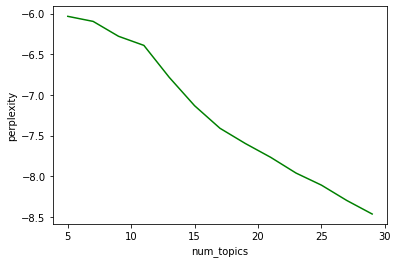

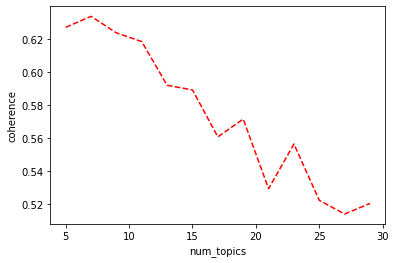

In [123]:
# 적정한 토픽 수를 보기 위해 perlexity와 coherence 확인
show_coherence(corpus, dictionary, processed_data, start = 5, end = 30)
#per 낮을 수록 좋고, coh 높을 수록 좋

perplexity는 혼란도 혹은 혼잡도로 번역되며, 보통은 특정한 확률 모형이 실제로 관특되는 값을 얼마나 유사하게 예측해내는지를 평가할 때 사용한다.(우리가 추정한 디리클레 모형이 주어진 문서 집합을 얼마나 유사하게 생성할 수 있는지)
토픽 응집도 coherence는 각 토픽에서 상위 비중을 차지하는 단어들이 의미적으로 유사한지를 나타내는 척도이다.

## 시각화

In [124]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [125]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'file_name.html')

In [126]:
#5
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(vis)

In [128]:
for i, topic_list in enumerate(model[corpus]):
  if i==50:
    break
  print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.42596945), (1, 0.08217081), (2, 0.23019181), (3, 0.091934316), (4, 0.16973363)]
1 번째 문서의 topic 비율은 [(0, 0.17105138), (1, 0.08110952), (2, 0.2940792), (3, 0.020888684), (4, 0.4328712)]
2 번째 문서의 topic 비율은 [(0, 0.21161991), (1, 0.08423182), (2, 0.29200652), (3, 0.012835221), (4, 0.39930654)]
3 번째 문서의 topic 비율은 [(0, 0.09131533), (1, 0.7053685), (2, 0.16768548), (3, 0.020741647), (4, 0.014888991)]
4 번째 문서의 topic 비율은 [(0, 0.3036383), (1, 0.12064408), (2, 0.27876157), (3, 0.026264237), (4, 0.27069184)]
5 번째 문서의 topic 비율은 [(0, 0.14764306), (1, 0.26611632), (2, 0.2328744), (3, 0.02626363), (4, 0.3271026)]
6 번째 문서의 topic 비율은 [(0, 0.45129207), (1, 0.10643957), (2, 0.39510062), (3, 0.028264018), (4, 0.018903697)]
7 번째 문서의 topic 비율은 [(0, 0.15226258), (1, 0.50142527), (2, 0.30113354), (3, 0.02630382), (4, 0.01887476)]
8 번째 문서의 topic 비율은 [(0, 0.110206276), (1, 0.61600083), (2, 0.23813331), (3, 0.020766418), (4, 0.014893139)]
9 번째 문서의 topic 비율은 [(0, 0.12271951), (1, 0.2714889

In [129]:
len(corpus)
#각각의 corpus가 댓글 1개

24488

In [130]:
def make_topictable_per_doc(model, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(model[corpus]):
        doc = topic_list[0] if model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%),
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [131]:
def make_topictable_per_doc(model, corpus):
    topic_table = []
    for i, doc in enumerate(corpus):
        topic_weights = model.get_document_topics(doc, minimum_probability=0.0)
        topic_weights = sorted(topic_weights, key=lambda x: (x[1]), reverse=True)
        if topic_weights:
            topic_num, prop_topic = topic_weights[0]
            topic_table.append((i, topic_num, round(prop_topic, 4)))
    return pd.DataFrame(topic_table, columns=['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중'])

In [132]:
topictable = make_topictable_per_doc(model, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', ' ', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0,0,0.4260
1,1,1,4,0.4329
2,2,2,4,0.3993
3,3,3,1,0.7054
4,4,4,0,0.3036
5,5,5,4,0.3271
6,6,6,0,0.4512
7,7,7,1,0.5014
8,8,8,1,0.6161
9,9,9,2,0.4054


In [133]:
topictable[15000:]

,문서 번호,,가장 높은 토픽의 비중,각 토픽의 비중
15000,15000,15000,2,0.7204
15001,15001,15001,2,0.4725
15002,15002,15002,2,0.8145
15003,15003,15003,2,0.4562
15004,15004,15004,2,0.7651
...,...,...,...,...
24483,24483,24483,2,0.7291
24484,24484,24484,2,0.6209
24485,24485,24485,1,0.5656
24486,24486,24486,2,0.7210


In [134]:
topictable['가장 높은 토픽의 비중'].value_counts()

가장 높은 토픽의 비중
2    11835
0     8502
1     3309
4      568
3      274
Name: count, dtype: int64

In [135]:
topictable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24488 entries, 0 to 24487
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   문서 번호         24488 non-null  int64  
 1                 24488 non-null  int64  
 2   가장 높은 토픽의 비중  24488 non-null  int64  
 3   각 토픽의 비중      24488 non-null  float32
dtypes: float32(1), int64(3)
memory usage: 669.7 KB


In [136]:
topic = pd.concat([df, topictable], axis=1)
topic.rename(columns={'가장 높은 토픽의 비중' : 'topic'}, inplace=True)
topic.head()

,group,prd_nm,text,문서 번호,,topic,각 토픽의 비중
0,2,센카 퍼펙트 휩 페이셜 워시,??세정력 별로에요\n디렉터파이님 영상 보면 선크림도 거의 못 지우고\n메이크업 후...,0,0,0,0.4260
1,2,센카 퍼펙트 휩 페이셜 워시,콩만큼 짜도 거품이 와아악 나요\n향기도 청량하이 화장 지우는 맛 납니당… 헹구고 ...,1,1,4,0.4329
2,2,센카 퍼펙트 휩 페이셜 워시,거품이 풍성해서 넘 좋아요 센카 브랜드는 워낙 클렌징폼으로 유명해서 의심없이 샀는데...,2,2,4,0.3993
3,2,센카 퍼펙트 휩 페이셜 워시,올리브영 세일기간이라 저렴한 가격에 잘 산거 같아서 매우 만족합니다,3,3,1,0.7054
4,2,센카 퍼펙트 휩 페이셜 워시,소량만으로도 쫀쫀한 거품이 아주 잘 나는 제품이에요\n몇년째 쓰고있는데 역시나 맘에듭니다,4,4,0,0.3036


In [137]:
topic.topic.value_counts()

topic
2    11835
0     8502
1     3309
4      568
3      274
Name: count, dtype: int64

In [138]:
topic.groupby('group')[['topic']].count()

,topic
group,
1,13818
2,10670


In [139]:
ratio = topic.groupby(['group', 'topic'])[['prd_nm']].count()
ratio.rename(columns = {'prd_nm':'cnt'}, inplace = True)
ratio = ratio.reset_index()

In [140]:
# 이성 소구와 감성 소구별 토픽의 개수 확인
ratio.sort_values(by = ['group', 'cnt'], ascending = [True, False])

,group,topic,cnt
2,1,2,7916
0,1,0,3940
1,1,1,1798
4,1,4,87
3,1,3,77
5,2,0,4562
7,2,2,3919
6,2,1,1511
9,2,4,481
8,2,3,197


#토픽 모델링_이성 + 감성(TOPIC 7)


In [215]:
from konlpy.tag import Mecab
mecab = Mecab()

In [216]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np

In [217]:
df['group'] = df['group'].map({3:1,
                               1:1,
                               2:2,
                               4:2})

In [218]:
df.rename(columns={'review' : 'text'}, inplace=True)
df.head()

,group,prd_nm,text
0,NaN,센카 퍼펙트 휩 페이셜 워시,??세정력 별로에요\n디렉터파이님 영상 보면 선크림도 거의 못 지우고\n메이크업 후...
1,NaN,센카 퍼펙트 휩 페이셜 워시,콩만큼 짜도 거품이 와아악 나요\n향기도 청량하이 화장 지우는 맛 납니당… 헹구고 ...
2,NaN,센카 퍼펙트 휩 페이셜 워시,거품이 풍성해서 넘 좋아요 센카 브랜드는 워낙 클렌징폼으로 유명해서 의심없이 샀는데...
3,NaN,센카 퍼펙트 휩 페이셜 워시,올리브영 세일기간이라 저렴한 가격에 잘 산거 같아서 매우 만족합니다
4,NaN,센카 퍼펙트 휩 페이셜 워시,소량만으로도 쫀쫀한 거품이 아주 잘 나는 제품이에요\n몇년째 쓰고있는데 역시나 맘에듭니다


In [219]:
# 텍스트 정제
def clean_text(text):
    text = text.replace(".", "").strip()
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

In [220]:
#문장 토큰
def get_nouns(tokenizer, sentence):
    tagged = tokenizer.pos(sentence)
    nouns = [s for s, t in tagged if t in ['NNG', 'NNP', 'VA', 'XR'] and len(s) >1]
    return nouns

def tokenize(df):
    tokenizer = Mecab(dicpath='/usr/local/lib/mecab/dic/mecab-ko-dic')
    processed_data = []
    for sent in tqdm(df['text']):
        sentence = clean_text(str(sent).replace("\n", "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

In [221]:
df.columns

Index(['group', 'prd_nm', 'text'], dtype='object')

In [222]:
def save_processed_data(processed_data):
    with open("tokenized_data_", 'w', newline="", encoding='utf-8') as f:
        writer = csv.writer(f)
        for data in processed_data:
            writer.writerow(data)

if __name__ == '__main__':
    df.columns=['group', 'prd_nm', 'text']
    df.dropna()
    processed_data = tokenize(df)
    save_processed_data(processed_data)

100%|██████████| 24488/24488 [00:06<00:00, 3648.81it/s]


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24488 entries, 0 to 24487
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   0 non-null      float64
 1   prd_nm  24488 non-null  object 
 2   text    24488 non-null  object 
dtypes: float64(1), object(2)
memory usage: 574.1+ KB


In [224]:
processed_data

[['세정력',
  '디렉터',
  '파이',
  '영상',
  '선크림',
  '메이크업',
  '세안',
  '사용',
  '거울',
  '나비',
  '모공',
  '메이크업',
  '잔여물',
  '피지',
  '패드',
  '세안',
  '세정력',
  '알칼리',
  '클렌징',
  '불구',
  '각질',
  '제거',
  '며칠',
  '사용',
  '피부',
  '느낌',
  '거품',
  '거품',
  '클렌징',
  '요생',
  '크림',
  '거품',
  '센카',
  '장점',
  '요즘',
  '국내',
  '브랜드',
  '제품',
  '알칼리',
  '거품',
  '풍성',
  '각질',
  '제거',
  '성비',
  '제품',
  '트리',
  '클렌징',
  '추천',
  '센카',
  '초반',
  '세계',
  '제품',
  '구매',
  '의사'],
 ['짜도', '거품', '향기도', '청량', '화장', '얼굴'],
 ['거품', '풍성', '센카', '브랜드', '클렌징', '유명', '의심', '풍성', '거품', '세안후', '수분', '유지'],
 ['올리브', '세일', '기간', '저렴', '가격', '만족'],
 ['소량', '거품', '제품', '역시'],
 ['짜도', '거품', '향도', '마음'],
 ['복합', '사용', '자극', '세정력'],
 ['프로모션', '구입', '요순', '보습'],
 ['구매', '사용', '추천', '올리브', '이것저것', '다양'],
 ['센카', '유명', '설명', '주위', '사람', '추천', '이야기', '정도', '제품'],
 ['리뉴얼', '거품', '쫀쫀', '기대'],
 ['세안', '필요', '구매', '거품', '쫀득', '풍성'],
 ['사용', '거품', '제품', '쫀쫀'],
 ['사용', '센카', '퍼펙트', '정착', '저렴'],
 ['뻑뻑', '세정력', '괜찮'],
 ['사용',
  '리뷰',
  '복합',
  '피부',
 

In [225]:
processed_data = [sent.strip().split(",") for sent in tqdm(open("tokenized_data_",'r',encoding='utf-8').readlines())]
processed_data = DataFrame(processed_data)
processed_data[0] = processed_data[0].replace(" ", np.nan)
#processed_data = processed_data[processed_data[0].notnull()]
processed_data = processed_data.values.tolist()
processed_data2=[]

100%|██████████| 24488/24488 [00:00<00:00, 256766.95it/s]


In [226]:
for i in processed_data:
  i = list(filter(None, i))
  processed_data2.append(i)
processed_data = processed_data2
processed_data

[['세정력',
  '디렉터',
  '파이',
  '영상',
  '선크림',
  '메이크업',
  '세안',
  '사용',
  '거울',
  '나비',
  '모공',
  '메이크업',
  '잔여물',
  '피지',
  '패드',
  '세안',
  '세정력',
  '알칼리',
  '클렌징',
  '불구',
  '각질',
  '제거',
  '며칠',
  '사용',
  '피부',
  '느낌',
  '거품',
  '거품',
  '클렌징',
  '요생',
  '크림',
  '거품',
  '센카',
  '장점',
  '요즘',
  '국내',
  '브랜드',
  '제품',
  '알칼리',
  '거품',
  '풍성',
  '각질',
  '제거',
  '성비',
  '제품',
  '트리',
  '클렌징',
  '추천',
  '센카',
  '초반',
  '세계',
  '제품',
  '구매',
  '의사'],
 ['짜도', '거품', '향기도', '청량', '화장', '얼굴'],
 ['거품', '풍성', '센카', '브랜드', '클렌징', '유명', '의심', '풍성', '거품', '세안후', '수분', '유지'],
 ['올리브', '세일', '기간', '저렴', '가격', '만족'],
 ['소량', '거품', '제품', '역시'],
 ['짜도', '거품', '향도', '마음'],
 ['복합', '사용', '자극', '세정력'],
 ['프로모션', '구입', '요순', '보습'],
 ['구매', '사용', '추천', '올리브', '이것저것', '다양'],
 ['센카', '유명', '설명', '주위', '사람', '추천', '이야기', '정도', '제품'],
 ['리뉴얼', '거품', '쫀쫀', '기대'],
 ['세안', '필요', '구매', '거품', '쫀득', '풍성'],
 ['사용', '거품', '제품', '쫀쫀'],
 ['사용', '센카', '퍼펙트', '정착', '저렴'],
 ['뻑뻑', '세정력', '괜찮'],
 ['사용',
  '리뷰',
  '복합',
  '피부',
 

In [227]:
len(processed_data)

24488

## Bag of words

In [228]:
import gensim
from gensim import corpora

In [229]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [230]:
dictionary = corpora.Dictionary(processed_data)

In [231]:
corpus = [dictionary.doc2bow(text) for text in processed_data]

## 모델링

In [232]:
df.prd_nm.nunique()

24

In [233]:
df.prd_nm.value_counts()

prd_nm
닥터지 브라이트닝 필링젤                                        3984
프리메라 페이셜 마일드 필링                                      2998
센카 퍼펙트 휩 페이셜 워시                                      2913
바닐라코 클린잇제로 클렌징밤 포어클래리파잉                              2287
마녀공장 퓨어 클린징 오일                                       1982
바이오더마 센시비오                                           1792
마녀공장 갈락 필링젤                                          1620
[단독대용량] 바닐라코 립 앤 아이 리무버 클리어 250ml                     998
[단독기획] 비플레인 녹두 약산성 클렌징폼 (본품160ml+폼20ml+오일20ml 증정)     972
[증량] 마녀공장 퓨어&딥 클렌징 폼 1+1 기획 (120ml+120ml)             947
참존 징코 수딩 앤 클렌징 티슈 70매                                 878
메디필 레드 락토 콜라겐 클리어 300ml                               473
메디필 엑스트라 슈퍼9 플러스 250ml (피지연화제)                        360
니베아 센서티브 미셀라 에어 클렌징 워터                                356
더말로지카 데일리 마이크로폴리언트                                    342
에센허브 소이빈90 딥클렌징오일 오리지널                                266
뷰 앰플 클렌저 기획세트(150ml+60ml)                             257
유리프 키 페

### 파라미터

In [234]:
num_topics = 7
chunksize = 2000 #한번에 처리하는 문서 사이즈 계산 속도와 관련 있음
passes = 20 #전체를 몇번 계산 할지
iterations = 400 #알고리즘 최적화를 위해 반복되는 단계의 수로, 1번의 반복은 CHUNK 단위로 이루어짐
eval_every = None #평가 주기인데, NONE이면 평가 X

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [235]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -6.6791.
[([(0.09298467, '사용'),
   (0.092794366, '자극'),
   (0.09112309, '피부'),
   (0.07343123, '각질'),
   (0.056634847, '필링'),
   (0.047036316, '제거'),
   (0.042737782, '제품'),
   (0.032546602, '얼굴'),
   (0.018382154, '정도'),
   (0.017776545, '느낌'),
   (0.016841061, '순하'),
   (0.0143080605, '민감'),
   (0.011627599, '효과'),
   (0.011291069, '추천'),
   (0.011031389, '예민'),
   (0.010961669, '알갱이'),
   (0.0106003005, '부드럽'),
   (0.009726419, '상태'),
   (0.0075943773, '타입'),
   (0.0071972515, '화장')],
  -1.8198374997054028),
 ([(0.08835829, '클렌징'),
   (0.04295689, '사용'),
   (0.03296292, '제품'),
   (0.031359423, '화장'),
   (0.029892538, '세안'),
   (0.02750646, '세정력'),
   (0.017531084, '느낌'),
   (0.016320828, '오일'),
   (0.016186995, '워터'),
   (0.015541953, '메이크업'),
   (0.01405727, '티슈'),
   (0.011766518, '피부'),
   (0.010190912, '지성'),
   (0.010099844, '촉촉'),
   (0.009416454, '성분'),
   (0.0093868505, '리무버'),
   (0.00933509, '깔끔'),
   (0.008791486, '추천'),
   (0.008086362, '깨끗'),
  

In [236]:
from gensim.models import CoherenceModel

def show_coherence(corpus, dictionary, texts, start = 5, end = 30):
    iter_num = []
    per_value = []
    coh_value = []

    for i in tqdm(range(start, end+1, 2)):
        model = LdaModel(corpus = corpus, id2word = dictionary, chunksize = 1000, num_topics = i, random_state = 7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model = model, corpus = corpus, texts = texts, coherence='c_v')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

  8%|▊         | 1/13 [00:15<03:07, 15.65s/it]

num_topics: 5, perplexity: -6.032, coherence: 0.627


 15%|█▌        | 2/13 [00:30<02:44, 14.95s/it]

num_topics: 7, perplexity: -6.095, coherence: 0.634


 23%|██▎       | 3/13 [00:43<02:21, 14.12s/it]

num_topics: 9, perplexity: -6.278, coherence: 0.624


 31%|███       | 4/13 [00:56<02:05, 13.98s/it]

num_topics: 11, perplexity: -6.390, coherence: 0.618


 38%|███▊      | 5/13 [01:11<01:53, 14.16s/it]

num_topics: 13, perplexity: -6.783, coherence: 0.592


 46%|████▌     | 6/13 [01:27<01:42, 14.67s/it]

num_topics: 15, perplexity: -7.133, coherence: 0.589


 54%|█████▍    | 7/13 [01:41<01:28, 14.68s/it]

num_topics: 17, perplexity: -7.410, coherence: 0.561


 62%|██████▏   | 8/13 [01:56<01:13, 14.71s/it]

num_topics: 19, perplexity: -7.598, coherence: 0.572


 69%|██████▉   | 9/13 [02:11<00:59, 14.84s/it]

num_topics: 21, perplexity: -7.768, coherence: 0.529


 77%|███████▋  | 10/13 [02:26<00:44, 14.95s/it]

num_topics: 23, perplexity: -7.962, coherence: 0.556


 85%|████████▍ | 11/13 [02:41<00:29, 14.97s/it]

num_topics: 25, perplexity: -8.110, coherence: 0.522


 92%|█████████▏| 12/13 [02:56<00:14, 14.76s/it]

num_topics: 27, perplexity: -8.300, coherence: 0.514


100%|██████████| 13/13 [03:10<00:00, 14.64s/it]

num_topics: 29, perplexity: -8.466, coherence: 0.520


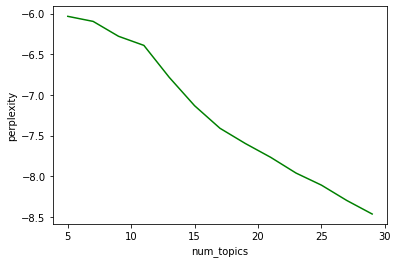

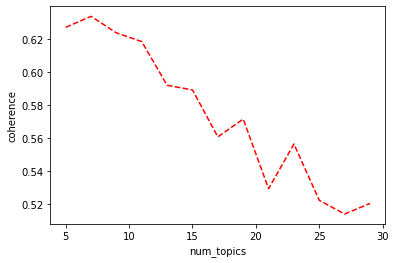

In [237]:
show_coherence(corpus, dictionary, processed_data, start = 5, end = 30)
#per 낮을 수록 좋고, coh 높을 수록 좋

perplexity는 혼란도 혹은 혼잡도로 번역되며, 보통은 특정한 확률 모형이 실제로 관특되는 값을 얼마나 유사하게 예측해내는지를 평가할 때 사용한다.(우리가 추정한 디리클레 모형이 주어진 문서 집합을 얼마나 유사하게 생성할 수 있는지)
토픽 응집도 coherence는 각 토픽에서 상위 비중을 차지하는 단어들이 의미적으로 유사한지를 나타내는 척도이다.

## 시각화

In [238]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [239]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'file_name.html')

In [240]:
#7
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(vis)

In [242]:
for i, topic_list in enumerate(model[corpus]):
  if i==50:
    break
  print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.08335984), (1, 0.057299055), (3, 0.20842348), (5, 0.111257836), (6, 0.5348759)]
1 번째 문서의 topic 비율은 [(0, 0.2644856), (1, 0.019284235), (2, 0.013071944), (3, 0.29452536), (4, 0.011130093), (5, 0.116067104), (6, 0.28143567)]
2 번째 문서의 topic 비율은 [(0, 0.23219395), (1, 0.01267328), (3, 0.22155607), (5, 0.16777483), (6, 0.34989917)]
3 번째 문서의 topic 비율은 [(0, 0.013300316), (1, 0.019164518), (2, 0.012992444), (3, 0.19523747), (4, 0.011061953), (5, 0.6268193), (6, 0.12142399)]
4 번째 문서의 topic 비율은 [(0, 0.11224657), (1, 0.023115546), (2, 0.015670054), (3, 0.28842065), (4, 0.0133425165), (5, 0.1750324), (6, 0.3721723)]
5 번째 문서의 topic 비율은 [(0, 0.22099616), (1, 0.023115022), (2, 0.015669702), (3, 0.23481588), (4, 0.013342218), (5, 0.31412748), (6, 0.17793357)]
6 번째 문서의 topic 비율은 [(0, 0.016041433), (1, 0.023115156), (2, 0.01566916), (3, 0.4610102), (4, 0.0133417575), (5, 0.14663908), (6, 0.3241832)]
7 번째 문서의 topic 비율은 [(0, 0.016045485), (1, 0.023120102), (2, 0.01567311), (3, 0.28

In [243]:
len(corpus)
#각각의 corpus가 댓글 1개

24488

In [244]:
def make_topictable_per_doc(model, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(model[corpus]):
        doc = topic_list[0] if model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%),
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [245]:
def make_topictable_per_doc(model, corpus):
    topic_table = []
    for i, doc in enumerate(corpus):
        topic_weights = model.get_document_topics(doc, minimum_probability=0.0)
        topic_weights = sorted(topic_weights, key=lambda x: (x[1]), reverse=True)
        if topic_weights:
            topic_num, prop_topic = topic_weights[0]
            topic_table.append((i, topic_num, round(prop_topic, 4)))
    return pd.DataFrame(topic_table, columns=['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중'])

In [246]:
topictable = make_topictable_per_doc(model, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', ' ', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0,6,0.5349
1,1,1,3,0.2945
2,2,2,6,0.3499
3,3,3,5,0.6268
4,4,4,6,0.3722
5,5,5,5,0.3142
6,6,6,3,0.4610
7,7,7,5,0.3452
8,8,8,5,0.3959
9,9,9,3,0.3337


In [247]:
topictable[15000:]

,문서 번호,,가장 높은 토픽의 비중,각 토픽의 비중
15000,15000,15000,3,0.7303
15001,15001,15001,3,0.4347
15002,15002,15002,3,0.6735
15003,15003,15003,3,0.4103
15004,15004,15004,3,0.7401
...,...,...,...,...
24483,24483,24483,3,0.5831
24484,24484,24484,3,0.4180
24485,24485,24485,5,0.5374
24486,24486,24486,3,0.5786


In [248]:
topictable['가장 높은 토픽의 비중'].value_counts()

가장 높은 토픽의 비중
3    12053
6     8194
5     3991
1      126
0       65
2       41
4       18
Name: count, dtype: int64